In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
from lbg_forecast.sps import simulate_sed
from lbg_forecast.sps import initialise_sps_model
from lbg_forecast.sps import define_sps_parameters
from lbg_forecast.sps import plot_sed

In [3]:
sps_model = initialise_sps_model()

In [4]:
sps_params = define_sps_parameters(age=1e-3,mass=1e9,tau=0.1,const=0.3,
                                   redshift=3.5,metal=-0.3, dustesc=7.0, 
                                   dust1=0.1, dust2=0.2, tburst=1e-1,
                                   fburst=0.0, igm=0.9,
                                   gas_ion=-1, gas_z=-5, fagn=100, 
                                   imf1=1.3, imf2=2.3, imf3=2.3)

spectrum = simulate_sed(sps_model, sps_params)

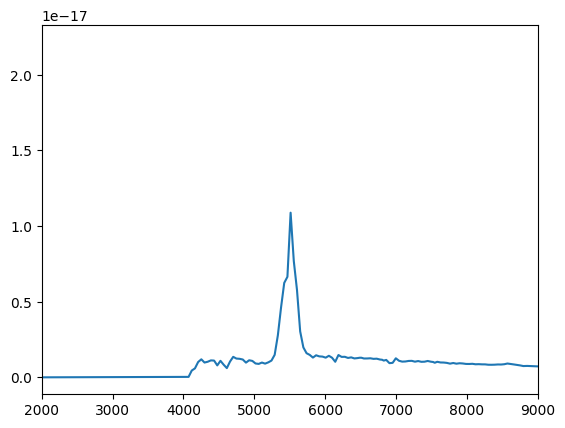

In [6]:
plot_sed(spectrum)
import matplotlib.pyplot as plt
#plt.xlim(500, 500000)
#plt.xscale("log")